In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"./data/data_for_clustering.csv")
df.head()

,Unnamed: 0,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
0,0,15500000.0,62500000.0,2.0,1.0,670.0,0.0,0.0
1,1,17500000.0,70833333.0,31.0,3.0,402.0,1.0,17708333.0
2,2,17500000.0,59333333.0,0.0,0.0,505.0,0.0,0.0
3,3,15500000.0,61166667.0,64.0,5.0,508.0,1.0,15291667.0
4,4,8700000.0,56166667.0,14.0,2.0,371.0,0.0,0.0


In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        


In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
0,0.000000,0.190476,-0.800000,-0.6,1.589041,-1.0,-0.928218
1,0.266667,0.984127,-0.413333,-0.2,0.365297,0.0,0.123762
2,0.266667,-0.111111,-0.826667,-0.8,0.835616,-1.0,-0.928218
3,0.000000,0.063492,0.026667,0.2,0.849315,0.0,-0.019802
4,-0.906667,-0.412698,-0.640000,-0.4,0.223744,-1.0,-0.928218


c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

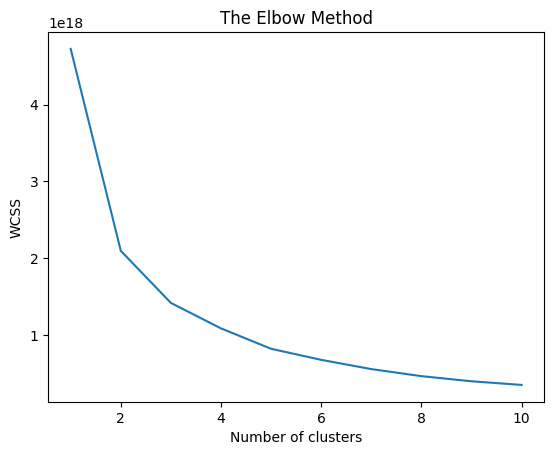

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

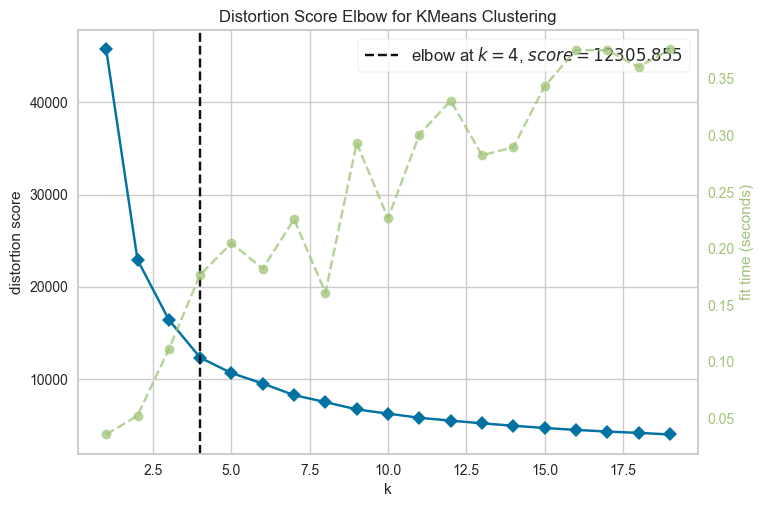

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,20), timings= True)
visualizer.fit(df2)        # Fit data to visualizer
visualizer.show()     

In [8]:
df_new = pd.read_csv("./data/data_for_clustering.csv")
df_new.sample(5)

,Unnamed: 0,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
3454,3454,26500000.0,133166667.0,0.0,0.0,586.0,0.0,0.0
4622,4622,15500000.0,68666667.0,94.0,7.0,125.0,1.0,17166667.0
3294,3294,10500000.0,64000000.0,40.0,3.0,244.0,1.0,16000000.0
277,277,5000000.0,60000000.0,17.0,1.0,277.0,1.0,15000000.0
3527,3527,19000000.0,63333333.0,115.0,9.0,298.0,2.0,31666667.0


In [9]:
df_new.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
for i in df_new.columns:
    if df_new[i].dtype == "object":
        df_new[i] = df_new[i].astype("category")
        


In [11]:
columns = {}
for i in df_new.columns:
    if df_new[i].dtype == "category" or df_new[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df_new[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df_new[[i for i in df_new.columns if i not in columns]])
df3 = pd.DataFrame(scaler.transform(df_new[[i for i in df_new.columns if i not in columns]]), columns=df_new[[i for i in df_new.columns if i not in columns]].columns)
for i in columns:
    df3[i] = df[i]
df3.head(5)

,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
0,0.000000,0.190476,-0.800000,-0.6,1.589041,-1.0,-0.928218
1,0.266667,0.984127,-0.413333,-0.2,0.365297,0.0,0.123762
2,0.266667,-0.111111,-0.826667,-0.8,0.835616,-1.0,-0.928218
3,0.000000,0.063492,0.026667,0.2,0.849315,0.0,-0.019802
4,-0.906667,-0.412698,-0.640000,-0.4,0.223744,-1.0,-0.928218


c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

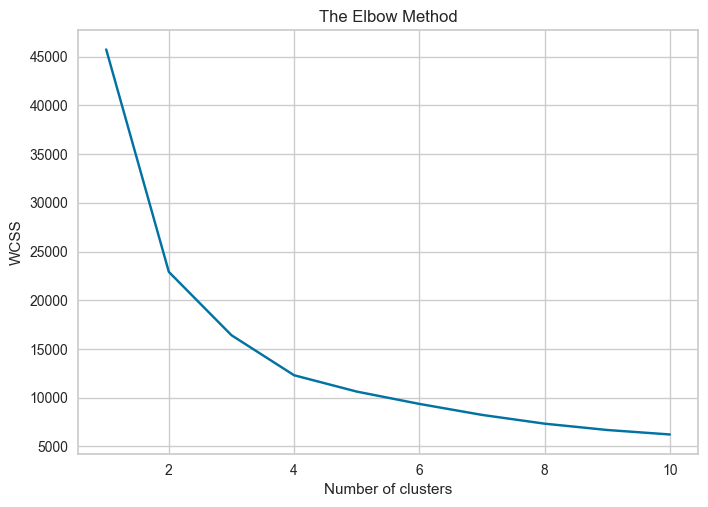

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

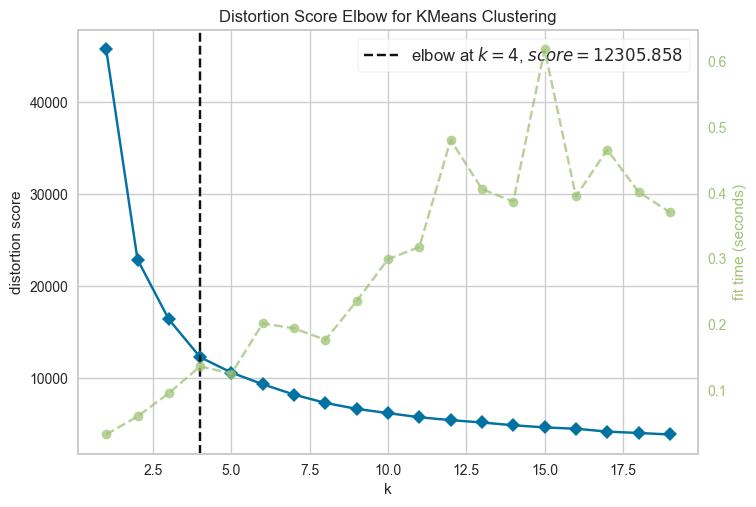

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,20), timings= True)
visualizer.fit(df3)        # Fit data to visualizer
visualizer.show()     